In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import yfinance as yf
from datetime import date, timedelta


sns.set_style("darkgrid")

In [6]:
end_date = date.today()
start_date = "2017-01-01"
interval = "1d"

# df = yf.download("MB=F", start=start_date.strftime("%Y-%m-%d"), end=end_date.strftime("%Y-%m-%d"), interval=interval)
# df.rename(columns={"Adj Close": "price"}, inplace=True)
# df.tail()

In [7]:
commodity_tickers = ["CL=F", "BZ=F", "NG=F", "TTF=F", "RB=F", "MB=F", "EH=F", "HO=F"]
benchmark_tickers = ["SPY"]
tickers = commodity_tickers + benchmark_tickers

df = pd.DataFrame(columns=tickers)

for ticker in tickers:
    ticker_df = yf.download(ticker, start=start_date, end=end_date, interval=interval)
    df[ticker] = ticker_df["Adj Close"]
    
print(df.head(2))
print(df.tail(2))

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
                 CL=F       BZ=F   NG=F  TTF=F    RB=F       MB=F   EH=F  \
Date                                                                       
2017-01-03  52.330002  55.470001  3.327    NaN  1.6218  49.180000  1.570   
2017-01-04  53.259998  56.459999  3.267    NaN  1.6459  50.110001  1.507   

              HO=F         SPY  
Date                            
2017-01-

In [20]:
df.dropna(inplace=True)

df["bmonth_end"] = df.index + pd.offsets.BMonthEnd(0)
df["is_bmonth_end"] = df["bmonth_end"] == df.index


for ticker in tickers:
    simple_returns = f"{ticker}_simple_returns"
    df[simple_returns] = df[ticker].pct_change()
    
    df[simple_returns].fillna(0.0, inplace=True)
    df[simple_returns].replace([np.inf, -np.inf], 0.0, inplace=True)
    df[simple_returns].replace(-1.0, 0.0, inplace=True)
    
    if ticker not in benchmark_tickers:
        indices = df[df["is_bmonth_end"]].index
        df.loc[indices, simple_returns] -= 0.005
        
    df[f"{ticker}_cumulative_returns"] = (1.0 + df[simple_returns]).cumprod()
    
df.dropna(inplace=True)

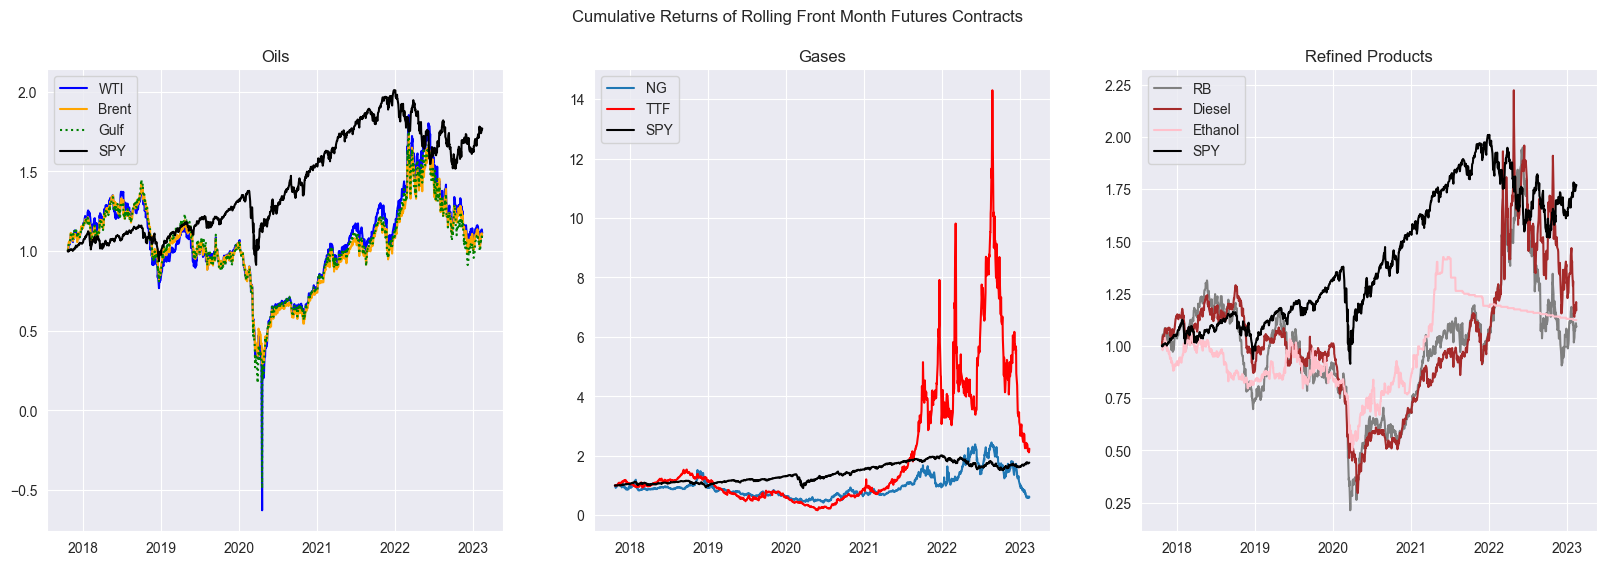

In [21]:
fig = plt.figure()
# fig.set_size_inches(16, 6)
fig.set_size_inches(20, 6)

plt.suptitle("Cumulative Returns of Rolling Front Month Futures Contracts")
    
plt.subplot(1, 3, 1)
plt.plot(df["CL=F_cumulative_returns"], color="blue", label="WTI")
plt.plot(df["BZ=F_cumulative_returns"], color="orange", label="Brent")
plt.plot(df["MB=F_cumulative_returns"], color="green", label="Gulf", linestyle="dotted")
plt.plot(df["SPY_cumulative_returns"], color="black", label="SPY")
plt.title("Oils")
plt.legend()

plt.subplot(1, 3, 2)
plt.plot(df["NG=F_cumulative_returns"], label="NG")
plt.plot(df["TTF=F_cumulative_returns"], color="red", label="TTF")
plt.plot(df["SPY_cumulative_returns"], color="black", label="SPY")
plt.title("Gases")
plt.legend()

plt.subplot(1, 3, 3)
plt.plot(df["RB=F_cumulative_returns"], color="grey", label="RB")
plt.plot(df["HO=F_cumulative_returns"], color="brown", label="Diesel")
plt.plot(df["EH=F_cumulative_returns"], color="pink", label="Ethanol")
plt.plot(df["SPY_cumulative_returns"], color="black", label="SPY")
plt.title("Refined Products")
plt.legend()
plt.savefig("futures.png")
plt.show()

<AxesSubplot: xlabel='Date'>

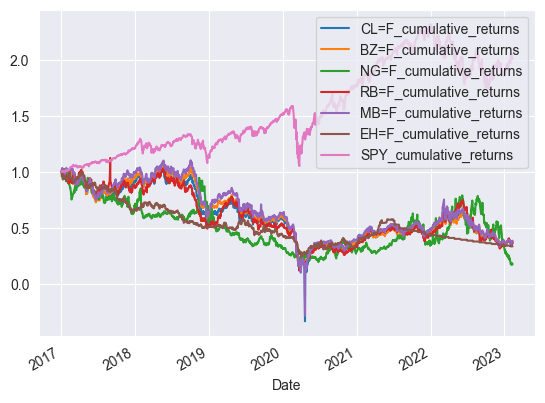

In [83]:
cret_df = df.filter(like="cumulative_returns")
cret_df.plot()